In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('new_222_data_train_decorr_imputed_transformed.csv')
df_test = pd.read_csv('new_222_data_test_decorr_imputed_transformed.csv')
df.sample(3)

,Average Workers_Compensation_Costs_(per $100 of payroll),Debt_Service_as_a_Share_of_Tax_Revenue,Estate_Inheritance_Tax_Levied_Flag,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Cost_of_Living,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,Prev_Yr_Agri_Pct_GDP_log,Prev_Yr_EduS_Pct_GDP_log,Prev_Yr_EntS_Pct_GDP_log,Prev_Yr_FinS_Pct_GDP_log,Prev_Yr_GoTr_Pct_GDP_log,Prev_Yr_Gvmt_Pct_GDP_log,Prev_Yr_Info_Pct_GDP_log,Prev_Yr_Manu_Pct_GDP_log,Prev_Yr_Mine_Pct_GDP_log,Prev_Yr_Retl_Pct_GDP_log,"Property_Tax_Burden_(per $1,000 of personal income)","Public_Employees_Per_10,000_of_Population_(full-time equivalent)",Recently_Legislated_Tax_Changes,"Remaining_Tax_Burden(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Tax_Expenditure_Limits,Top_Marginal_Personal_Income_Tax_Rate,coastline_flag,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,pop_10yr_pct_chg,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists_log,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths_log,prev_year_long_commute_driving_alone,prev_year_mental_health_providers_log,prev_year_preventable_hospital_stays_log,prev_year_primary_care_physicians_log,prev_year_severe_housing_problems_log,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime_log,prev_yr_rent_50_2_log,two_yrs_prior_pct_it_workers_log,population_2020_log,microbusiness_density
584,1.64,0.06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.036343,0.500053,-0.394481,-0.237319,0.247618,-0.082910,-0.269212,0.103205,-0.086034,-0.033752,1.499623,1.196948,0.770108,2.649715,0.000000,2.105353,0.000000,3.033028,0.104360,1.749200,27.04,491.9,-0.66,12.39,20.47,66.1,7.25,0.0,0.06,0.0,1.587897,1.437027,1.046913,2.568959,-1.877369,0.751795,-0.753825,-0.407226,1.039611,1.264798,0.84,0.36,9.9,0.15,9.212438,0.85,0.0,0.90,0.49,4.356709,0.40,8.989818,8.729235,8.648397,0.122218,3.5,0.21,6.107023,6.643790,0.693147,10.597459,1.098245
363,1.25,0.08,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.374372,0.944615,-0.132943,-0.114580,-0.579921,-0.385852,0.398328,0.078346,-0.376416,0.199296,0.019803,2.236445,1.601406,2.940220,1.068153,3.257712,1.759581,1.701105,0.076961,2.010895,30.55,547.3,0.07,12.90,24.20,70.7,12.56,3.0,0.05,0.0,1.796690,-0.045776,-1.307391,-3.736429,1.905061,1.859048,0.471475,-0.263413,-0.993647,16.141594,0.88,0.23,6.2,0.40,6.867974,0.79,1.0,0.77,0.45,4.553877,0.28,5.673323,7.776115,7.409136,0.148420,8.7,0.09,5.993961,7.175490,1.360977,13.498483,9.054515
1357,1.56,0.04,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.556688,-0.600289,-0.372372,-0.075683,-0.046527,0.586140,-0.027592,0.151948,-0.088695,0.080929,1.247032,1.283708,0.959350,2.917771,0.000000,2.468947,2.438863,2.294553,0.000000,1.915451,24.83,473.7,-1.90,14.50,24.26,72.2,7.25,1.0,0.07,0.0,-2.618422,-0.941410,-0.198540,0.826004,-0.984159,0.570063,0.244767,0.597599,0.483468,1.798172,0.74,0.36,6.9,0.17,8.537192,0.93,0.0,0.70,0.30,4.382027,0.27,7.844241,7.647309,7.616284,0.165514,3.9,0.18,4.615121,6.661855,0.875469,9.245804,2.570806


In [3]:
X = df.loc[:, df.columns != 'microbusiness_density']
y = df['microbusiness_density']
y = np.log(y)

X_test = df_test.loc[:, df_test.columns != 'microbusiness_density']
y_test = df_test['microbusiness_density']
y_test = np.log(y_test)

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
# grid search
param_grid = {'max_depth': np.arange(3, 10) ,
              'min_samples_split': np.arange(2, 10, 2)}

tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
tree.fit(X, y)

print("Best parameters: {}".format(tree.best_params_))
print("Best cross-validation score: {:.2f}".format(tree.best_score_))

Best parameters: {'max_depth': 4, 'min_samples_split': 2}
Best cross-validation score: 0.49


In [6]:
best_max_depth = 4
best_min_samples_split = 2

# get cross validation scores
tree = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
rmse = np.sqrt(-cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error'))
print('RMSE =', round(rmse.mean(),3), '±', round(rmse.std(),3))

RMSE = 0.552 ± 0.04


In [7]:
# test set performance
from sklearn.metrics import mean_squared_error

tree.fit(X, y)
y_pred = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE =', round(rmse,3))

RMSE = 0.502


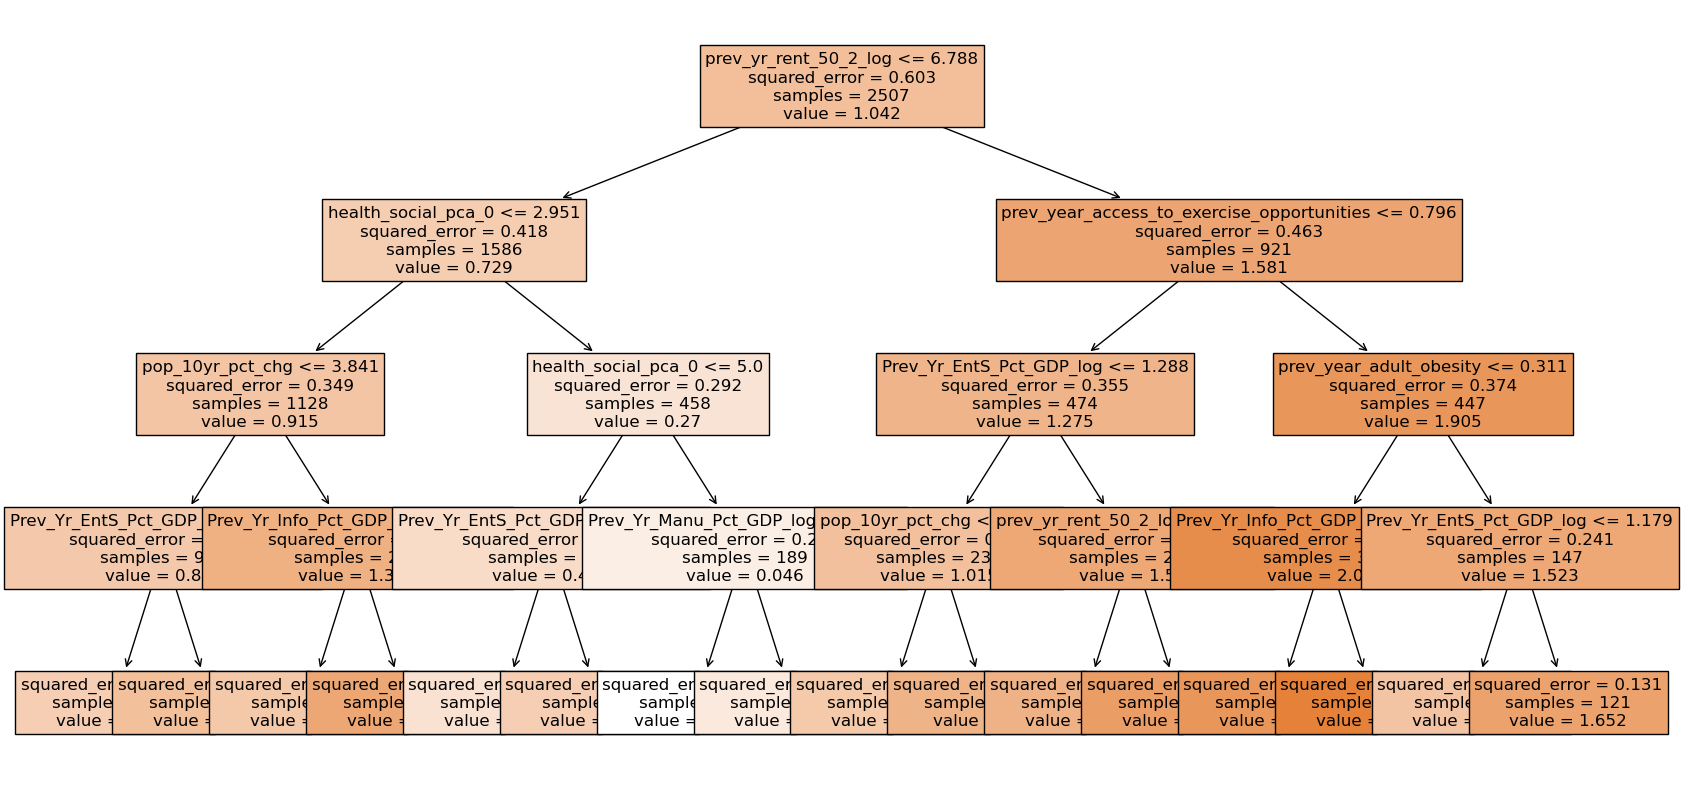

In [8]:
# visualize the tree
from sklearn.tree import plot_tree
tree.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, fontsize=12, feature_names=X.columns)
plt.show()